# <b> Advanced Data Analytics</b> 
D213 - Task 1
Jeremy Dorrough<br>
Western Governors University<br>
WGU Student ID# 000994113<br>

---
# <mark>Note:</mark>

Please note that the written portion of this assessment is stylized to enhance readability, with section labels (e.g. "A1.") highlighted, corresponding to rubric tasks. Written portions precede discussed code, calculations, and visualizations. Additional information can be found in code comments (e.g. "# Load data set") and annotations.

---

# Part I

### <mark>A1.</mark>

Can an ARIMA model be developed to predict the future revenue trend for the telecom company based on its revenue performance in the first two years?



### <mark>A2.</mark>

Some reasonable objectives and goals for the data analysis are:

•  Examine and preprocess the dataset for analysis.<br>
•  Find any seasonal trends or patterns in the revenue data.<br>
•  Build a time series model using the initial two years' revenue data.<br>
•  Validate the model using a portion of the existing data.<br>
•  Forecast the revenue with training and test data using the time series model.<br>

Revenue for the first two years will be used, which should reveal performance patterns and trend, which can be used to create a forecast model.

---

# Part II

### <mark>B.</mark>

Time series models make key assumptions about the data: stationarity and autocorrelation. Stationarity means that the underlying time series data has a constant mean and variance over time and doesn’t have trends or seasonality (National Institute of Standards and Technology [NIST], n.d.). Autocorrelation is the correlation of a time series with a lagged version of itself (Penn State Eberly College of Science, 2018). 

In [1]:
# Basic Data Analytics
import pandas as pd
import numpy as np
from datetime import datetime

# Scaling and splitting
from sklearn.preprocessing import StandardScaler

# Statistical analysis
from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Time series analysis
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
import pmdarima as pm

# Library for signal processing
from scipy import signal

# Plotting/visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Stylization
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.25
plt.rcParams['font.size'] = 7
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data set
df = pd.read_csv('~/Desktop/D213/wgu_data/teleco_time_series.csv')

In [3]:
# Date format
df['Date'] = (pd.date_range(datetime(2021,8,2), periods=df.shape[0])) #arbitrarily set at two years before task submission date
df.set_index('Date', inplace=True)
df.head()

,Day,Revenue
Date,,
2021-08-02,1,0.000000
2021-08-03,2,0.000793
2021-08-04,3,0.825542
2021-08-05,4,0.320332
2021-08-06,5,1.082554


---
# Part III

### <mark>C1.</mark>

The line graph visualization of revenue over time shows revenue (in millions of dollars) on the y-axis and the day (time step) on the x-axis.

### <mark>C2.</mark>

The time series data is formatted such that each observation is associated with a specific day. It is continuous without any null values. The day column was not in a date format suitable for analysis so it was converted arbitrarily to a specific two year range prior to the task submission date.

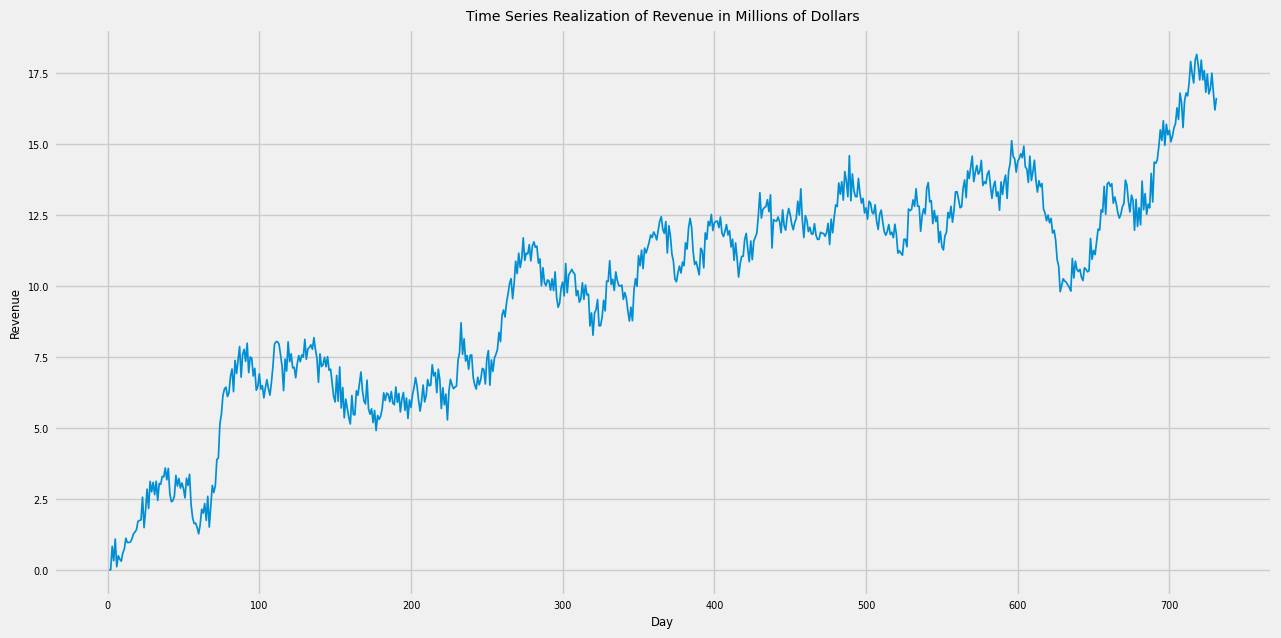

In [4]:
#Plot Time Series
plt.figure(figsize=(14,7))
plt.plot(df['Day'], df['Revenue'])
plt.title('Time Series Realization of Revenue in Millions of Dollars')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

In [30]:
#Drop day
df.drop(columns=['Day'], inplace=True)

KeyError: "['Day'] not found in axis"

### <mark>C3.</mark>

The Augmented Dickey-Fuller (ADF) test suggests that the data is non-stationary with an ADF statistic value of -1.93, this is confirmed by a p-value score of 0.32, having a significance of 32%. The data was transformed to stationary with a resulting ADF value of -44.87 and a p-value of below 0.00, indicating stationarity (Fomby, 2022; Garcia, 2022). The later calculation results can be seen in the calculation in the following section, C4.

In [6]:
# Stationarity check (Garcia, 2022)
result = adfuller(df['Revenue'])
print('ADF: %f' % result[0])
print('P-Value for ADF: %f' % result[1])

ADF: -1.924612
P-Value for ADF: 0.320573


### <mark>C4.</mark>

To correct the non-stationarity, a differencing method was applied to the original series. The data was then split into a training set (first 80% of the data) and a test set (remaining 20%).

In [7]:
# Make non-stationary via differencing
differenced = df.Revenue.diff().dropna()

[]

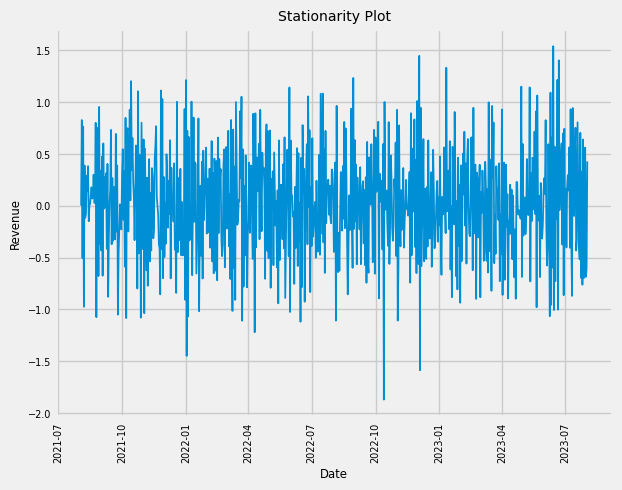

In [8]:
#Stationarity plot
sns.lineplot(data=differenced)
plt.xticks(rotation = 'vertical')
plt.title('Stationarity Plot')
plt.plot()

In [9]:
# Check data
differenced.head()

Date
2021-08-03    0.000793
2021-08-04    0.824749
2021-08-05   -0.505210
2021-08-06    0.762222
2021-08-07   -0.974900
Name: Revenue, dtype: float64

In [10]:
#ADF Test
adf = differenced
adf_result = adfuller(adf, autolag='AIC')
print('ADF: %f' % adf_result[0])
print('P-Value for ADF: %f' % adf_result[1])

ADF: -44.874527
P-Value for ADF: 0.000000


In [29]:
# Set split
split = int(len(df) * .8)

# Training/Test Split
train = differenced[:split]
test = differenced[split:]

# Check split
print('Training:', len(train), 'values')
print('Test:', len(test), 'values')

Training: 584 values
Test: 146 values


### <mark>C5.</mark>

Please find a copy of the prepared dataset is attached as 'prepared_data.csv’'.

In [12]:
# Save CSV
differenced.to_csv('~/Desktop/D213/prepared_data.csv')

---
# Part IV

### <mark>D1.</mark>

The data analysis results indicate:

•  A: There is not a clear seasonality observed in the data beyond the seven day, weekly cycle.<br>
•  B: Aftere differencing, there are no apparent trends. Before differencing, there were clear trends in the data, particularly revenue growth over time.<br> 
•  C: The autocorrelation function shows significant dependence on previous days.<br>
•  D: Spectral density showed no significant patterns in the data (Kumar, 2022).<br>
•  E: The time series was decomposed, which showed that differencing was successful and resulted in data stationarity.<br>
•  F: Residuals of the decomposed series were stationary, confirming the lack of trends.

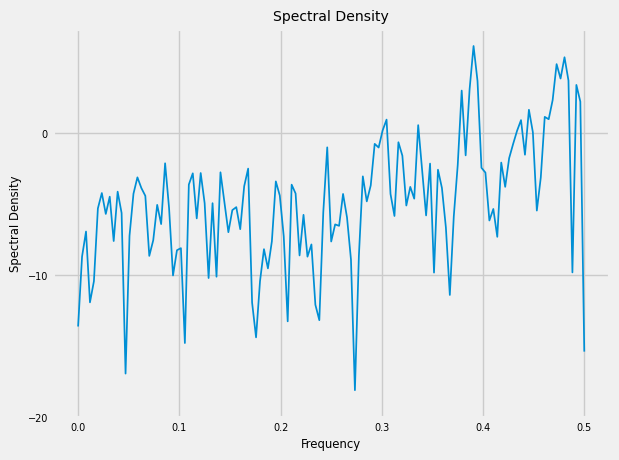

In [13]:
# Spectral Density plot (Kumar, 2022)

plt.psd(differenced, NFFT=256, Fs=1, Fc=0)
plt.title('Spectral Density')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.show()

### <mark>D2.</mark>

The best identified ARIMA model for forecasting the telecom company's revenue is ARIMA(1,0,0). The optimal autoregressive (AR) model was assessed for the data, evaluating AR(1) and AR(2) based on the ACF/PACF (see figures below) results which showed no strong correlation after lags 2 and 1, respectively, so the significant autocorrelation at lag 1 suggested that AR(1) should be used. Akaike Information Criterion (AIC) values were generated for both models. The AIC for AR(1) (773.89) was lowest, indicating the best fit. AR(1) was selected for the model, with the pdq being “1,0,0”, indicating the one ar coefficient and no linear relationship values two or more lags back (PSECS, 2023; Samson, 2022).

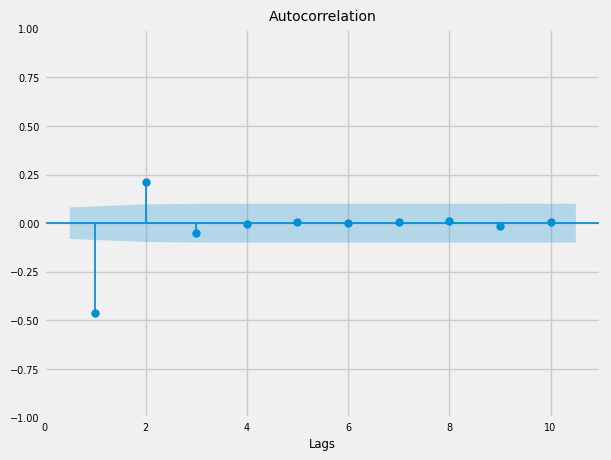

In [14]:
# ACF Plot
plot_acf(train, lags=10, zero=False)
plt.xlabel('Lags')
plt.show()

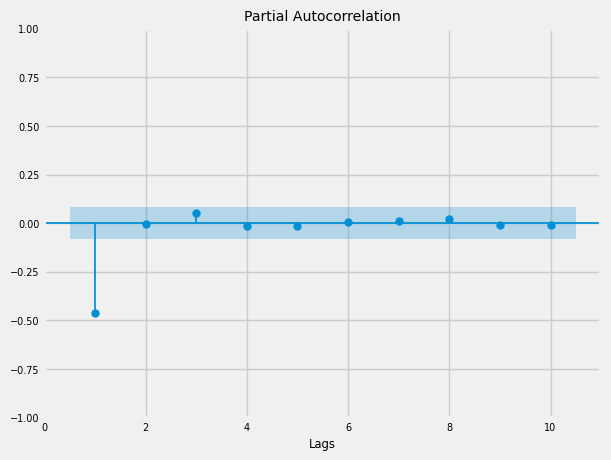

In [15]:
# PACF Plot
plot_pacf(train, lags=10, zero=False)
plt.xlabel('Lags')
plt.show()

[]

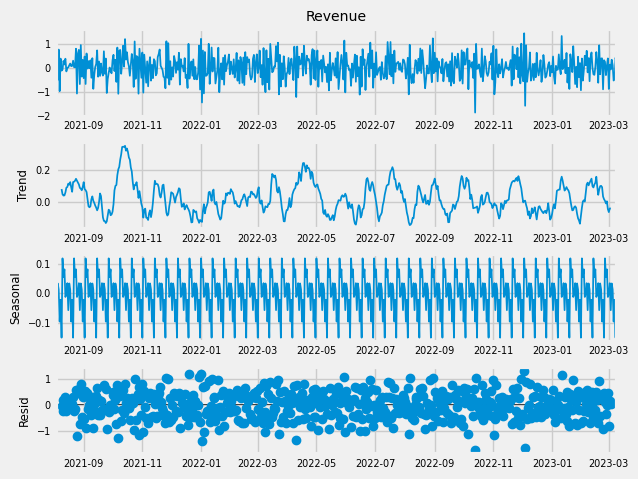

In [16]:
# Decomposed plots
results=seasonal_decompose(train, period=12)
results.plot().legends

### <mark>Note</mark>

While a manual ARIMA model is demonstrated below, the final model is based on AutoARIMA, discussed in section D. Both models resulted in pdq of 1,0,0.

<Axes: xlabel='Date'>

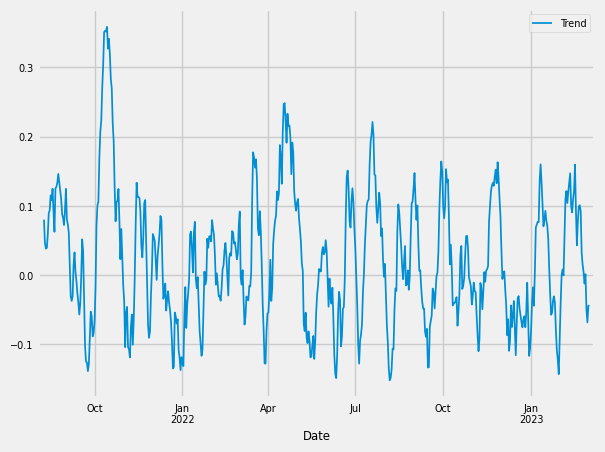

In [17]:
# Decomposed trend plot by itself
pd.Series(results.trend).rename('Trend').plot(legend=True)

<Axes: xlabel='Date'>

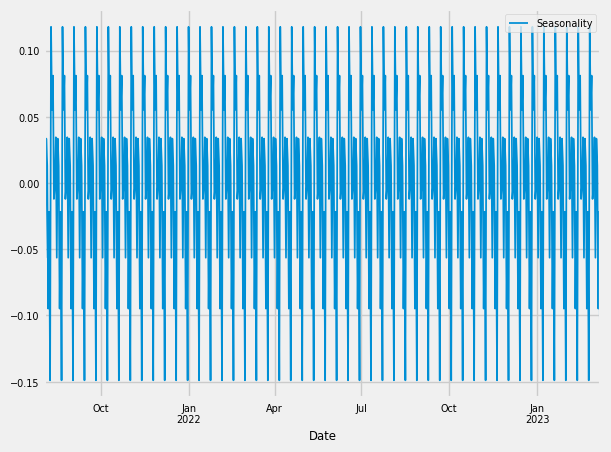

In [18]:
# Decomposed seasonality plot by itself
pd.Series(results.seasonal).rename('Seasonality').plot(legend=True)

<Axes: xlabel='Date'>

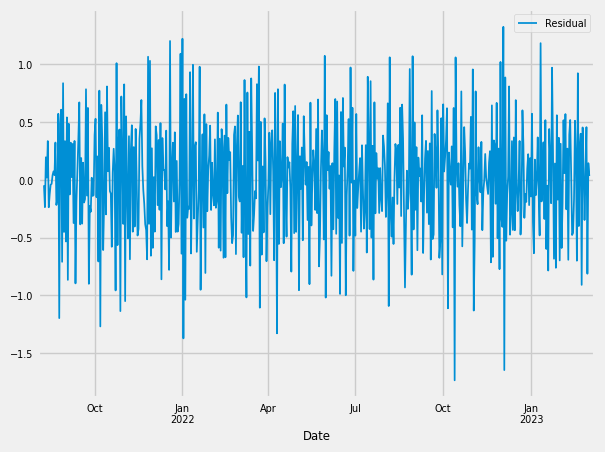

In [19]:
# Decomposed residual plot by itself
pd.Series(results.resid).rename('Residual').plot(legend=True)

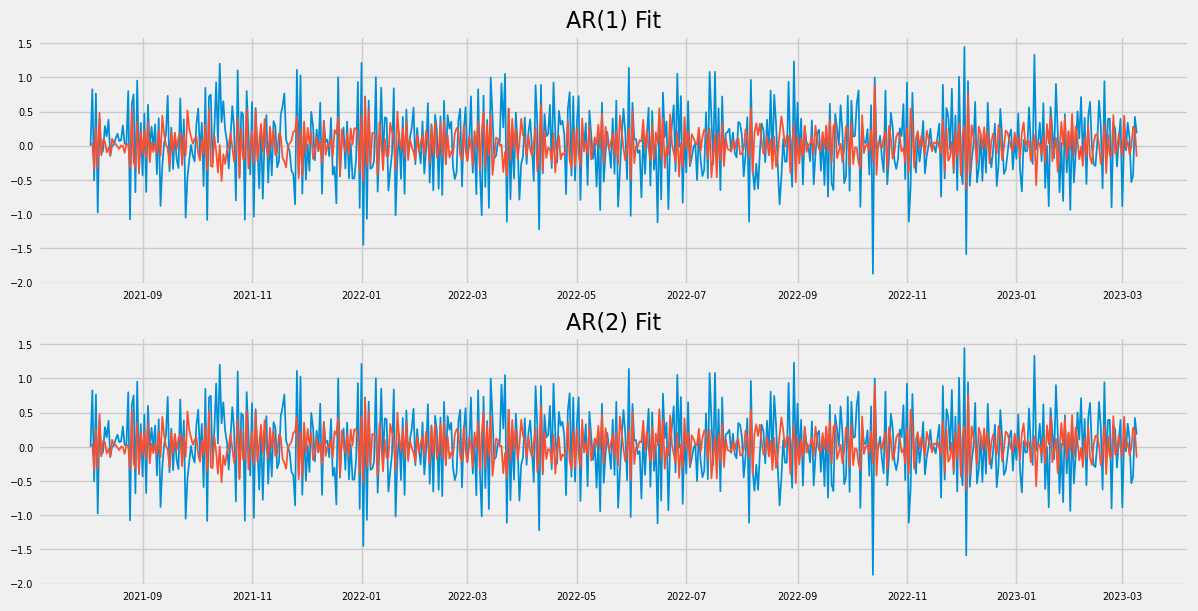

In [20]:
# AIC model selection (Samson, 2022)
# Plots to compare AR 1 and AR 2 (Stationary) predicitons

plt.figure(figsize=(12,12))

ar_orders = [1,2]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):
    ar_model = ARIMA(train, order=(ar_order,0,0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit
    plt.subplot(4,1,idx+1)
    plt.plot(train)
    plt.plot(ar_model_fit.fittedvalues)
    plt.title('AR(%s) Fit'%ar_order, fontsize=16)

plt.tight_layout()

In [21]:
#AIC comparison
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))

AIC for AR(1): 773.8925878321593
AIC for AR(2): 775.8863459233254


In [22]:
# Manual model
manual_model = sm.tsa.statespace.SARIMAX(train, order=(1,0,0))
manual_fit = manual_model.fit()
manual_fit.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.60096D-01    |proj g|=  3.70023D-03

At iterate    5    f=  6.60094D-01    |proj g|=  3.20045D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     10      1     0     0   1.718D-06   6.601D-01
  F =  0.66009439756875021     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  584
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -385.495
Date:                Wed, 02 Aug 2023   AIC                            774.990
Time:                        14:12:22   BIC                            783.730
Sample:                    08-03-2021   HQIC                           778.397
                         - 03-09-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4568      0.036    -12.605      0.000      -0.528      -0.386
sigma2         0.2191      0.014     15.965      0.000       0.192       0.246
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.85
Prob(Q):                              0.90   Prob(JB):                         0.40
Heteroskedasticity (H):               0.96   Skew:                            -0.08
Prob(H) (two-sided):                  0.79   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### <mark>D3.</mark>

The fitted model’s diagnostic plots were used to evaluate normality, confirming it’s generally normal distribution. A negligible presence of outliers suggest imperfect fit or the possible influence of outliers, as seen on the standardized residual and QQ plots. This should be taken into account when considering accuracy of the model. Nevertheless, the model appears to be generally suitable and well distributed.


The Revenue Predictions plot depicts the revenue of a telecom company across its initial two years, with consistent non-seasonal growth. Revenue data was split using an 80%/20% split for the training and test sets. The ARIMA model was trained on this split, using the training data, to forecast future revenue trends alongsidethe test data to validate it’s accuracy. The 95% confidence interval (CI) shows a large degree of uncertainty but the model's forecast aligns with the test data, reinforcing the company's growth.

### <mark>D4.</mark>

The output of the ARIMA model along with the calculations of the analysis is provided below (Selva Prabhakaran, n.d.).

### <mark>D5.</mark>

The Python code used to support the implementation of the time series model was provided along with the analysis.

In [23]:
# AutoARIMA model (Selva Prabhakaran, n.d.)
best_model = pm.auto_arima(train, start_p=0, start_q=0,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

best_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=1.42 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1304.814, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=999.334, Time=0.55 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.69 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1302.821, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1177.103, Time=0.08 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=905.038, Time=2.63 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=8.20 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1053.672, Time=2.39 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=906.929, Time=2.74 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=906.959, Time=3.23 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=939.970, Time=2.29 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=906.752, Time=8.16 sec
 ARIMA(1,0,0)(2,1,0)[12]             : AIC=90

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  584
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood                -447.538
Date:                            Wed, 02 Aug 2023   AIC                            903.076
Time:                                    14:13:05   BIC                            920.472
Sample:                                08-03-2021   HQIC                           909.862
                                     - 03-09-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4830      0.037    -12.940      0.000      -0.556      -0.410
ar.S.L12      -0.7325      0.041    -17.711      0.000      -0.814      -0.651
ar.S.L24      -0.3979      0.042     -9.421      0.000      -0.481      -0.315
sigma2         0.2760      0.017     16.338      0.000       0.243       0.309
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.45
Prob(Q):                              0.90   Prob(JB):                         0.80
Heteroskedasticity (H):               0.99   Skew:                            -0.02
Prob(H) (two-sided):                  0.94   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

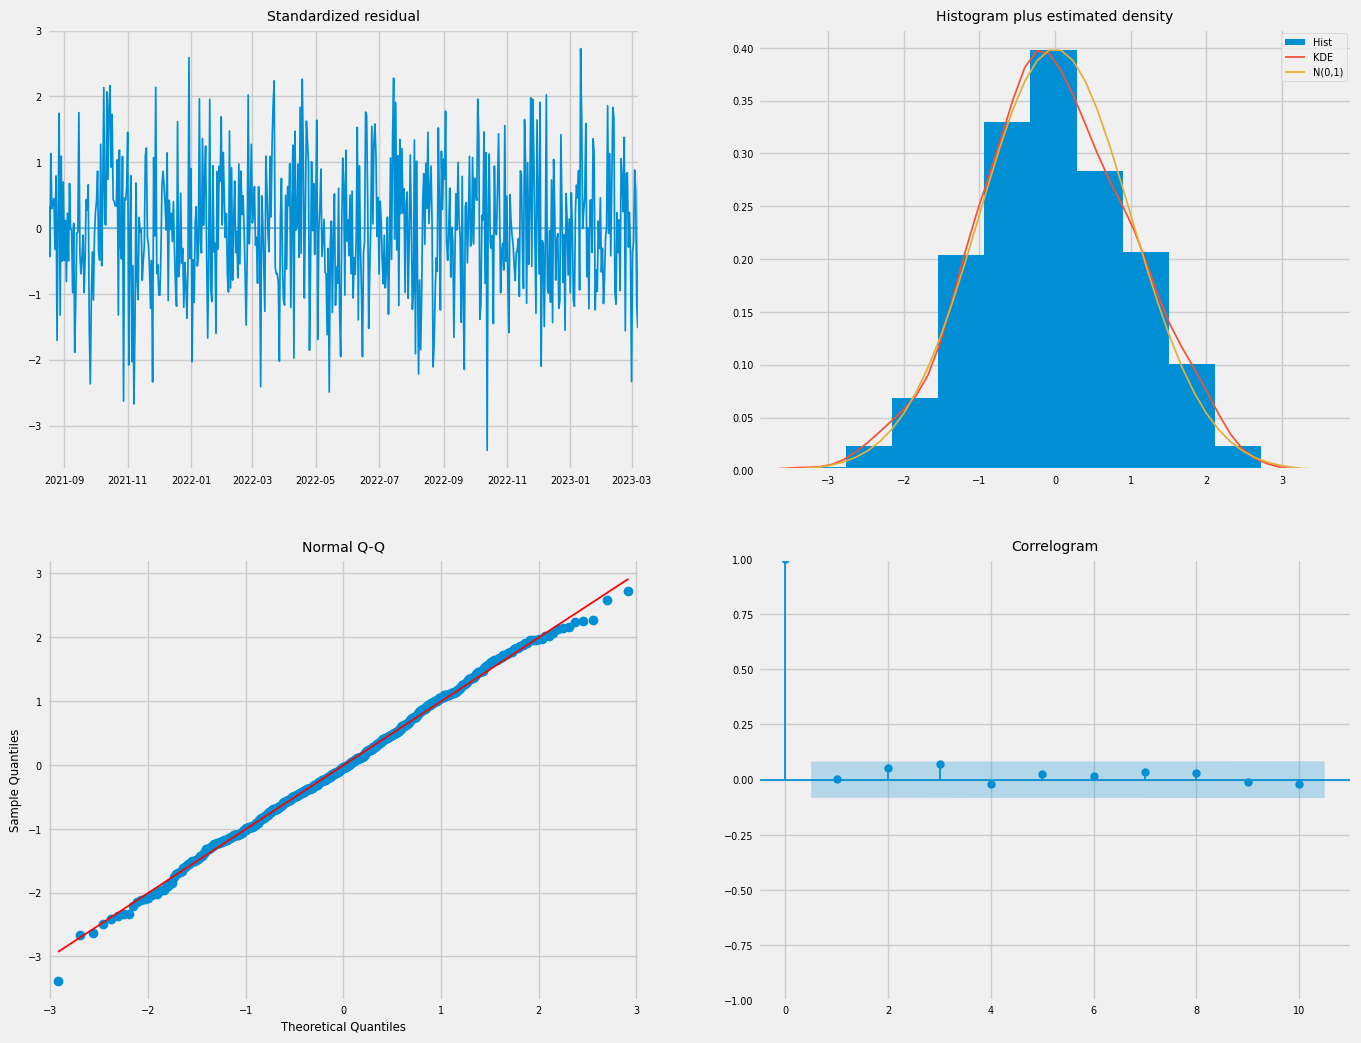

In [24]:
# Model fitting
best_fit = best_model.fit(train)

# Model diagnostics
best_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

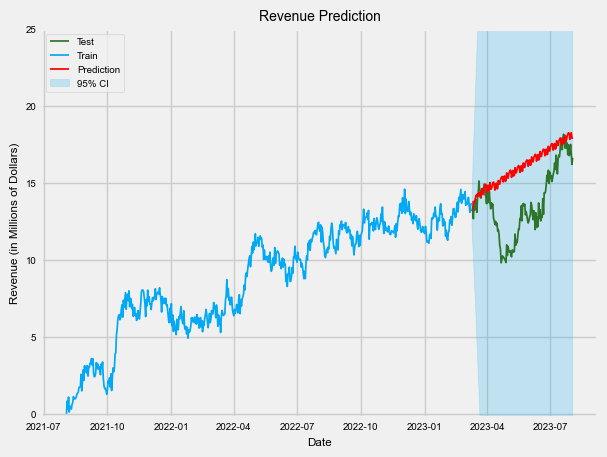

In [25]:
# Forecasting Plot (Thomas Vincent, 2017)

# Prediction with confidence intervals
forecast, forecast_ci = best_model.predict(n_periods=len(test), return_conf_int=True)

# Cumulative sums for prediction
train_cumsum = train.cumsum()
test_cumsum = train_cumsum.iloc[-1] + test.cumsum()
forecast_cumsum = train_cumsum.iloc[-1] + np.cumsum(forecast)

# Cumulative sums of lower/upper for confidence intervals
lower_bound = train_cumsum.iloc[-1] + np.cumsum(forecast_ci[:, 0])
upper_bound = train_cumsum.iloc[-1] + np.cumsum(forecast_ci[:, 1])

# Plot the data
plt.plot(test_cumsum, color='#2e742b', label = 'Test')
plt.plot(train_cumsum, color='#03a9f4', label = 'Train')
plt.plot(forecast_cumsum, color='red', label = 'Prediction')

# Plot the confidence interval
plt.fill_between(test.index, lower_bound, upper_bound, color='#03a9f4', alpha=.2, label='95% CI')
plt.ylim(-.25, 25)  # limit CI impact on plot scaling
plt.title('Revenue Prediction')
plt.xlabel('Date')
plt.ylabel('Revenue (in Millions of Dollars)')
plt.legend(loc='upper left')
sns.set()

In [26]:
# Show prediction intervals for forecast
forecast = pd.DataFrame(forecast, index=test.index, columns=['Prediction'])
forecast['Lower Bound'] = lower_bound
forecast['Upper Bound'] = upper_bound
forecast.head(5) 


,Prediction,Lower Bound,Upper Bound
Date,,,
2023-03-10,-0.416884,12.238344,14.297540
2023-03-11,0.001169,11.096104,15.442117
2023-03-12,0.519601,10.447339,17.130085
2023-03-13,-0.094666,9.178560,18.209532
2023-03-14,0.109060,8.112171,19.494042


In [27]:
#Calculate RMSE
mse = mean_squared_error(test, forecast.Prediction)
rmse = np.sqrt(mse)
print(f"RSME: {round(rmse, 2)}")

RSME: 0.59


---
# Part V

### <mark>E1.</mark>

The results of the data analysis show an increasing trend in the telecom company's revenue. The best ARIMA model for forecasting the telecom company's revenue is ARIMA(1,0,0) with a root mean squared error (RMSE) of 0.59, which was calculated to verify the model. So, the model's predictions average a distance of 0.59 units from the actual values. This difference could be several hundred thousand dollars difference for the company and must be considered, particularly in longer term forecasts.

The prediction intervals provided for the forecast are daily. It looks like uncertainty increases as the forecast goes further into the future. For example, in the printed prediction interval values, the 2023-03-10 values range from -0.42 to 14.30 and by 2023-03-14, their range increases to between 0.11 and 19.49.

The forecast length is justified by the fact that the data is split into 80% training and 20% testing over a 2 year period and the forecast is for the same time period as the test data, enabling the analyst to verify the predictive accuracy of the model within the forecast. It retains a large amount of data for training for improved modeling.

### <mark>E2.</mark>

The annotated visualization of the forecast of the final model compared to the test set can be found in section D5, above.

### <mark>E3.</mark>

Based on the results, the telecom company should, while considering external factors, use the ARIMA(1,0,0) model to forecast revenue. While generally accurate within the selected timeframe, the compnay should use the model for shorter time periods (months, not years) because it's accuracy decreases over time.

---
# Part VI

### <mark>F.</mark>

Penn State Eberly College of Science. (2023). 2.2 Partial Autocorrelation Function (PACF). STAT 510: Applied Time Series Analysis. https://online.stat.psu.edu/stat510/lesson/2/2.2

Fomby, T. B. (2022). Augmented Dickey-Fuller Unit Root Tests. Southern Methodist University. https://s2.smu.edu/tfomby/eco6375/BJ%20Notes/ADF%20Notes.pdf

National Institute of Standards and Technology (n.d.). NIST/SEMATECH e-Handbook of Statistical Methods. U.S. Department of Commerce. https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc442.htm

Penn State Eberly College of Science. (2018). 10.2 - Autocorrelation and Time Series Methods. STAT 462 Applied Regression Analysis. https://online.stat.psu.edu/stat462/node/188/

### <mark>G.</mark>

Fernandez Garcia, D. (2022, May 13). Stationarity: Augmented Dickey-Fuller Test in Python. Data Science Concepts. https://www.datascienceconcepts.com/tutorials/python-programming-language/stationarity-augmented-dickey-fuller-test-in-python/

Selva Prabhakaran. (n.d.). ARIMA Model – Complete Guide to Time Series Forecasting in Python. Machine Learning Plus. https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

Vincent, T. (2017, March 23). A Guide to Time Series Forecasting with ARIMA in Python 3. DigitalOcean. https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3

Samson. (2022, August 21). Model selection using AIC and BIC in python. Kaggle. https://www.kaggle.com/code/gourab1992/model-selection-using-aic-and-bic-in-python

Kumar, R. (2022, July 5). Plot the power spectral density using Matplotlib – Python. GeeksforGeeks. https://www.geeksforgeeks.org/plot-the-power-spectral-density-using-matplotlib-python/
